In [36]:
#libraries for data analysis part
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#libraries for ML part
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


%matplotlib inline

In [37]:
#from google.colab import drive
#drive.mount('/content/drive')

In [38]:
kid_df= pd.read_csv('C:/Users/KIIT/Programs/Projects/Content/kidney_disease.csv') #import dataset and read it
kid_df.head()#shows only 5 rows

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [39]:
kid_df.info()#get all information of data (column name,data type ,missing value,etc)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [40]:
# Drop the rows with 'ckd\t' in the 'classification' column
kid_df = kid_df[kid_df['classification'] != 'ckd\t']

# Reset the index to ensure it's continuous after dropping rows
kid_df.reset_index(drop=True, inplace=True)

In [41]:
kid_df['classification'].value_counts()

classification
ckd       248
notckd    150
Name: count, dtype: int64

In [42]:
# Replace values in the 'classification' column
kid_df['classification'] = kid_df['classification'].replace({'ckd': 1, 'notckd': 0})


In [43]:
kid_df['classification'].value_counts()

classification
1    248
0    150
Name: count, dtype: int64

In [44]:
kid_df = kid_df.drop(["bp","sc","pot","hemo","id","pcv","wc","rc","rbc","pc","pcc","ba","htn","dm","cad","appet","pe","ane","sod"], axis=1)
kid_df.head()

,age,sg,al,su,bgr,bu,classification
0,48.0,1.020,1.0,0.0,121.0,36.0,1
1,7.0,1.020,4.0,0.0,NaN,18.0,1
2,62.0,1.010,2.0,3.0,423.0,53.0,1
3,48.0,1.005,4.0,0.0,117.0,56.0,1
4,51.0,1.010,2.0,0.0,106.0,26.0,1


acknowledged/kidney issue-1
not ack/no kidney issue -0

In [45]:
kid_df.groupby('classification').mean()

,age,sg,al,su,bgr,bu
classification,,,,,,
0,46.516779,1.022414,0.000000,0.000000,107.722222,32.798611
1,54.425000,1.013937,1.721154,0.770732,175.523810,72.656170


C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\KIIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

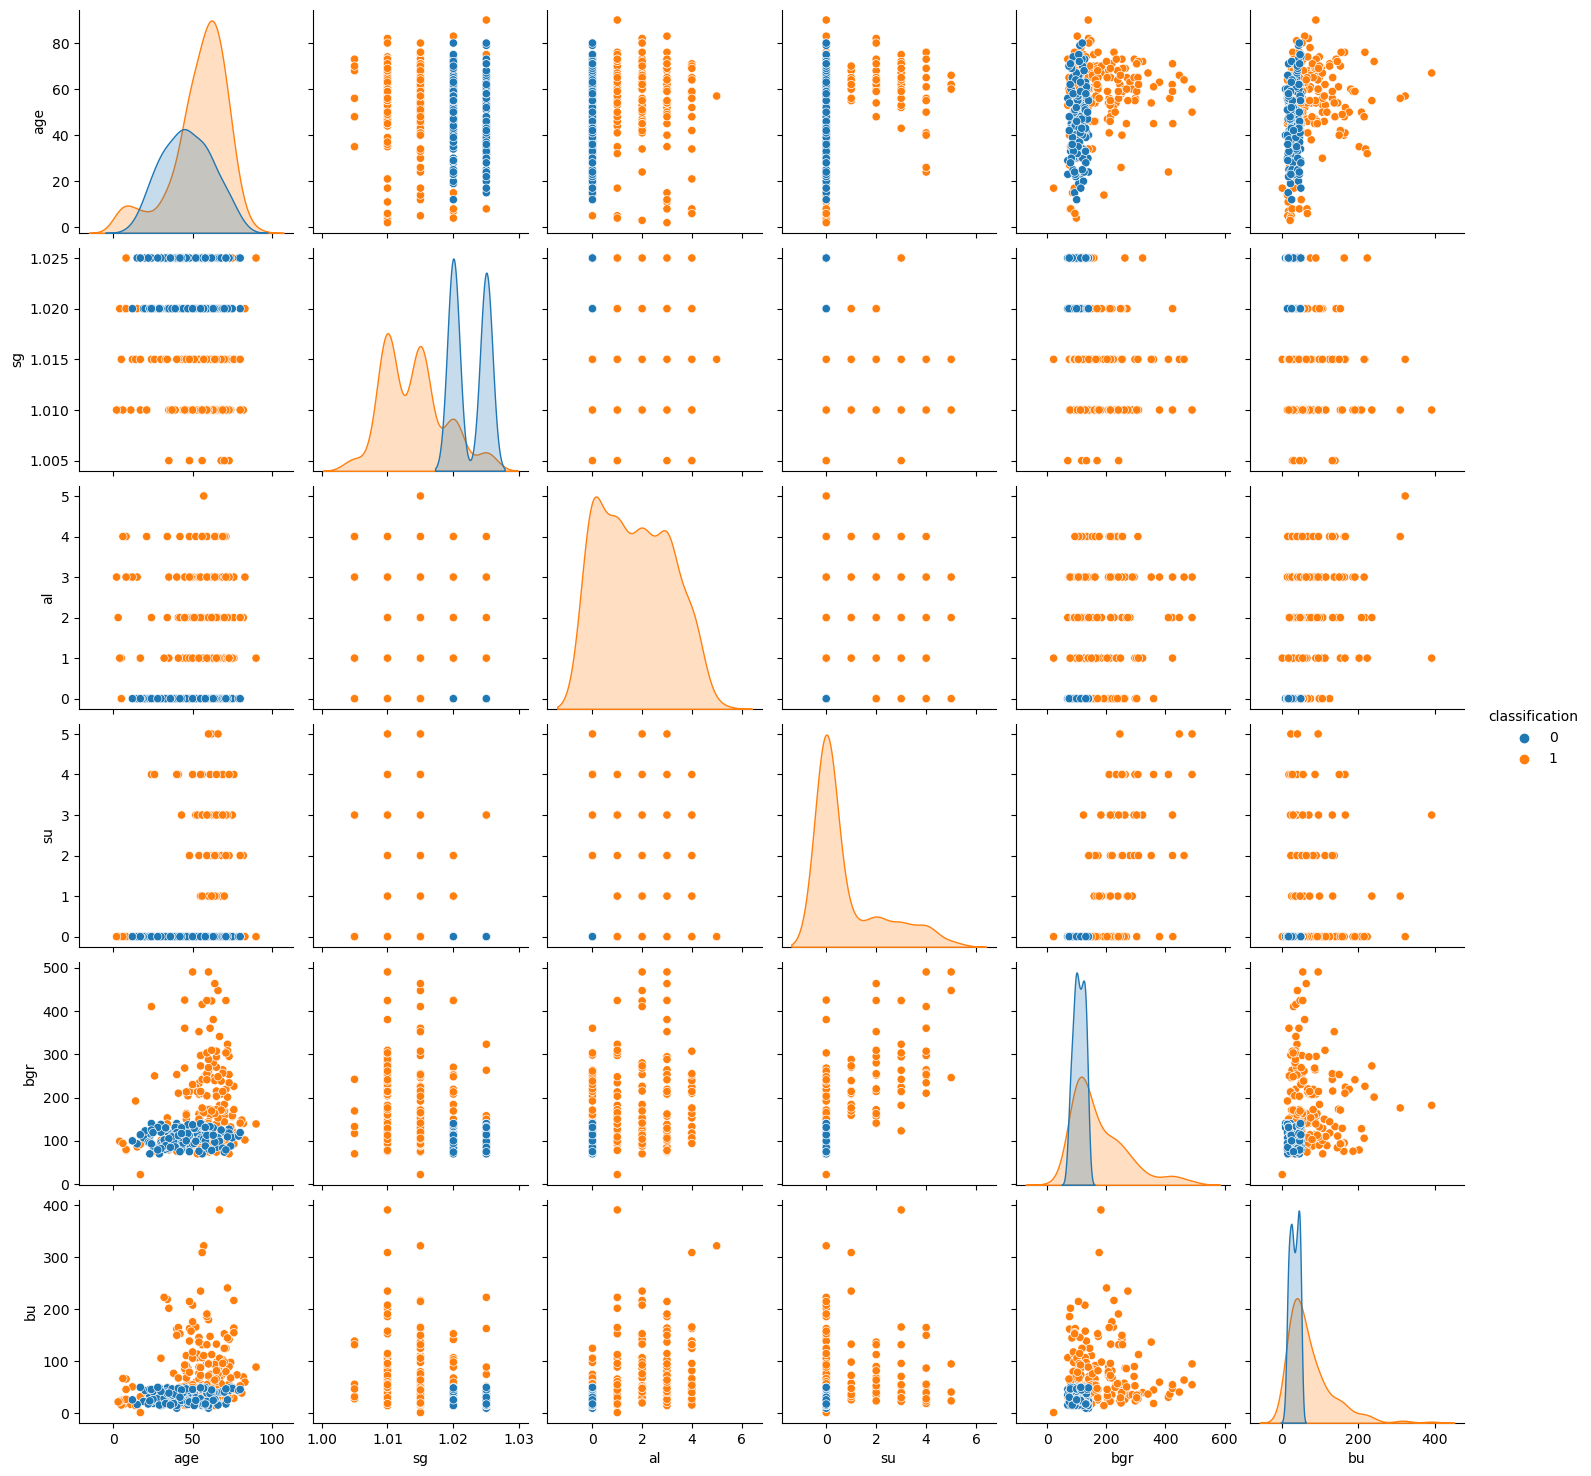

In [46]:
sns.pairplot(kid_df,hue = "classification")#vizualize the most determined feature that contribute to the outcome wrt target   (sns=sea born library,pairplot=map feature with each other)

In [47]:
corr = kid_df.corr()#correleation function to show correleation to find best dependecy
corr

,age,sg,al,su,bgr,bu,classification
age,1.000000,-0.188623,0.120541,0.222134,0.245090,0.198870,0.224211
sg,-0.188623,1.000000,-0.468538,-0.298542,-0.373523,-0.318385,-0.731560
al,0.120541,-0.468538,1.000000,0.270442,0.378599,0.455871,0.626458
su,0.222134,-0.298542,0.270442,1.000000,0.719130,0.167841,0.345483
bgr,0.245090,-0.373523,0.378599,0.719130,1.000000,0.144942,0.419703
bu,0.198870,-0.318385,0.455871,0.167841,0.144942,1.000000,0.382893
classification,0.224211,-0.731560,0.626458,0.345483,0.419703,0.382893,1.000000


In [48]:
columns_with_nan = kid_df.columns[kid_df.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)


Columns with NaN values: ['age', 'sg', 'al', 'su', 'bgr', 'bu']


In [49]:
kid_df['age'].fillna(kid_df['age'].mean(), inplace=True)

In [15]:
kid_df['sg'].fillna(kid_df['sg'].mean(), inplace=True)

In [16]:
kid_df.fillna(kid_df.mean(), inplace=True)


In [17]:
columns_with_nan = kid_df.columns[kid_df.isna().any()].tolist()
print("Columns with NaN values:", columns_with_nan)


Columns with NaN values: []


In [18]:
kid_df.head()

,age,sg,al,su,bgr,bu,classification
0,48.0,1.020,1.0,0.0,121.000000,36.0,1
1,7.0,1.020,4.0,0.0,147.943503,18.0,1
2,62.0,1.010,2.0,3.0,423.000000,53.0,1
3,48.0,1.005,4.0,0.0,117.000000,56.0,1
4,51.0,1.010,2.0,0.0,106.000000,26.0,1


<Axes: >

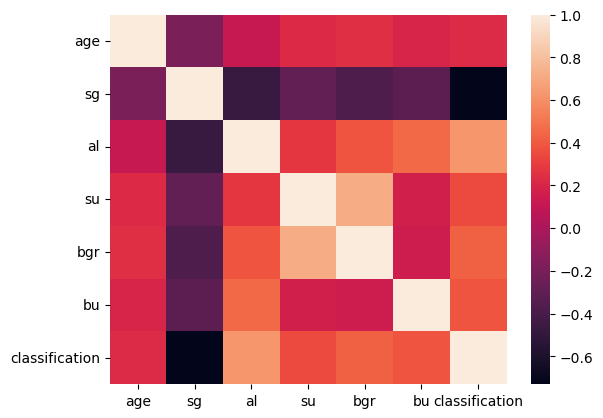

In [19]:
import seaborn as sns
sns.heatmap(corr,)#to vizualize graphically(lighter shade=best co-relation)

In [20]:
#separate the data and labels
x= kid_df.drop(columns= 'classification',axis=1)# all features
y= kid_df['classification']#labels
x.head()

,age,sg,al,su,bgr,bu
0,48.0,1.020,1.0,0.0,121.000000,36.0
1,7.0,1.020,4.0,0.0,147.943503,18.0
2,62.0,1.010,2.0,3.0,423.000000,53.0
3,48.0,1.005,4.0,0.0,117.000000,56.0
4,51.0,1.010,2.0,0.0,106.000000,26.0


In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,stratify=y,random_state=2)#y train=20,y test=80,stratify used to distribute evenly )

In [22]:
classifier = svm.SVC(kernel='linear')

In [23]:
classifier.fit(x_train,y_train)#training the model by giving only train data

SVC(kernel='linear')

In [24]:
x_train_prediction = classifier.predict(x_train)#test the accuracy of the training data set
training_data_accuracy = accuracy_score(x_train_prediction,y_train)

In [25]:
training_data_accuracy

0.89937106918239

In [26]:
x_train_prediction = classifier.predict(x_test)#test the accuracy of the training data set
training_data_accuracy = accuracy_score(x_train_prediction,y_test)

In [27]:
training_data_accuracy

0.875

In [28]:
input_data = (48,1.02,2,1,160,45)

input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
print(input_data_reshaped)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    message = 'Nothing to worry, You do not have any kidney disease.'
else:
    message = 'You have kidney disease, Kindly contact a doctor.'

BOLD = "\033[1m"
RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
formatted_input = f"{BOLD}Input Features: {RESET} {input_data}"
formatted_prediction = f"{BOLD}Prediction: {RESET} {RED if prediction == 1 else GREEN}{prediction}{RESET}"
formatted_message = f"{BOLD}Prediction Message: {RESET} {RED if prediction == 1 else GREEN}{message}{RESET}"

print(formatted_input)
print(formatted_prediction)
print(formatted_message)


[ 48.     1.02   2.     1.   160.    45.  ]
[[ 48.     1.02   2.     1.   160.    45.  ]]
[1]
Input Features:  (48, 1.02, 2, 1, 160, 45)
Prediction:  [1]
Prediction Message:  You have kidney disease, Kindly contact a doctor.


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [29]:
for column in x.columns:
  print(column)

age
sg
al
su
bgr
bu


In [30]:
import pickle #library for app

In [31]:
import os

# Define the path for the directory (replace with your desired directory path)
directory_path = '/path/to/health_data_analysis1'  # Example: '/home/user/my_data_directory'

# Create the directory if it doesn't exist
os.makedirs(directory_path, exist_ok=True)

# Check if the directory was created or already exists
if os.path.exists(directory_path):
    print(f"Directory '{directory_path}' has been created or already exists.")
else:
    print(f"Failed to create directory '{directory_path}'.")


Directory '/path/to/health_data_analysis1' has been created or already exists.


In [32]:
filename='kidney_model.sav'#give file name

In [33]:
pickle.dump(classifier,open(filename,'wb'))#save directory

In [34]:
loaded_model = pickle.load(open(filename,'rb'))

In [35]:
input_data = (48,1.02,2,1,160,45)

input_data_as_numpy_array = np.asarray(input_data)
print(input_data_as_numpy_array)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)
print(input_data_reshaped)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 0:
    message = 'Nothing to worry, You do not have any kidney disease.'
else:
    message = 'You have kidney disease, Kindly contact a doctor.'

BOLD = "\033[1m"
RESET = "\033[0m"
RED = "\033[91m"
GREEN = "\033[92m"
formatted_input = f"{BOLD}Input Features: {RESET} {input_data}"
formatted_prediction = f"{BOLD}Prediction: {RESET} {RED if prediction == 1 else GREEN}{prediction}{RESET}"
formatted_message = f"{BOLD}Prediction Message: {RESET} {RED if prediction == 1 else GREEN}{message}{RESET}"

print(formatted_input)
print(formatted_prediction)
print(formatted_message)


[ 48.     1.02   2.     1.   160.    45.  ]
[[ 48.     1.02   2.     1.   160.    45.  ]]
[1]
Input Features:  (48, 1.02, 2, 1, 160, 45)
Prediction:  [1]
Prediction Message:  You have kidney disease, Kindly contact a doctor.


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
